### P.A.L.M program and learn machine

In [14]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
# import all libraries and dependencies for dataframe
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
import seaborn as sns
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import MinMaxScaler

In [15]:
# Load the dataset
data = pd.read_csv("CO2 Emissions_Canada.csv")
data.head()

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


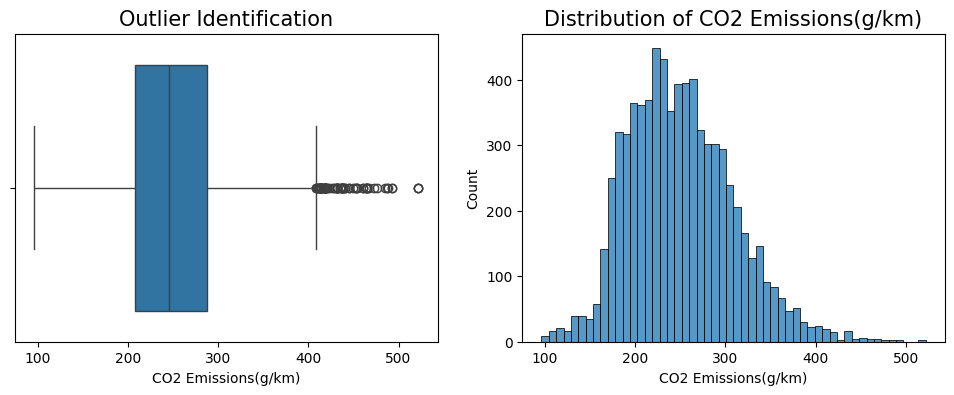

In [16]:
# checking outliers by boxplot for the outcome variable 'CO2 Emissions' and outcome variable distribution
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)  # 1 row, 2 columns, subplot 1
sns.boxplot(x=data['CO2 Emissions(g/km)'])
plt.title('Outlier Identification', fontsize=15 )
plt.subplot(1, 2, 2)  # 1 row, 2 columns, subplot 2
sns.histplot(x=data['CO2 Emissions(g/km)'])
plt.title('Distribution of CO2 Emissions(g/km)', fontsize=15 )
plt.show()

## removing outliers

In [17]:
#Defining the Quartiles for removal of outliers
Q1=data['CO2 Emissions(g/km)'].quantile(0.25)
Q3=data['CO2 Emissions(g/km)'].quantile(0.75)
IQR=Q3-Q1
lowoutlier=Q1-1.5*IQR
highoutlier=Q3+1.5*IQR
totaloutlier=((data['CO2 Emissions(g/km)']<lowoutlier)|(data['CO2 Emissions(g/km)']>highoutlier)).sum()
totaloutlier

80

In [18]:
# Removal of Outliers
data_new=data[(data['CO2 Emissions(g/km)']<highoutlier)&(data['CO2 Emissions(g/km)']>lowoutlier)]
#validating the removal of outlier
totaloutlier = ((data_new['CO2 Emissions(g/km)'] < lowoutlier) | (data_new['CO2 Emissions(g/km)'] > highoutlier)).sum()
print("Total Number of Outliers in the CO2 Emissions(g/km) are {}".format(totaloutlier))

Total Number of Outliers in the CO2 Emissions(g/km) are 0


In [19]:
scaler_input = MinMaxScaler()
scaler_target = MinMaxScaler()


In [20]:
numerical_columns=data_new.select_dtypes(exclude=['object']).columns
# numerical_columns
y=data_new['CO2 Emissions(g/km)']
x=data_new[numerical_columns].drop('CO2 Emissions(g/km)',axis=1)


In [21]:
x.head()


,Engine Size(L),Cylinders,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg)
0,2.0,4,9.9,6.7,8.5,33
1,2.4,4,11.2,7.7,9.6,29
2,1.5,4,6.0,5.8,5.9,48
3,3.5,6,12.7,9.1,11.1,25
4,3.5,6,12.1,8.7,10.6,27


In [22]:
y.head()


0    196
1    221
2    136
3    255
4    244
Name: CO2 Emissions(g/km), dtype: int64

In [23]:
target_output = y.to_numpy()
target_output

array([196, 221, 136, ..., 240, 232, 248], dtype=int64)

In [24]:
input_features_scaled = scaler_input.fit_transform(x)
target_output_scaled = scaler_target.fit_transform(target_output.reshape(-1, 1)).flatten()


In [25]:
x_train,x_test,y_train,y_test = train_test_split(input_features_scaled, target_output_scaled,test_size=0.3,random_state=100)

X_train shape: (5112, 6)
y_train shape: (5112,)

X_train summary:
       Engine Size(L)    Cylinders  Fuel Consumption City (L/100 km)  \
count     5112.000000  5112.000000                       5112.000000   
mean         0.297671     0.286255                          0.366554   
std          0.178206     0.199508                          0.147397   
min          0.000000     0.000000                          0.000000   
25%          0.146667     0.111111                          0.262222   
50%          0.280000     0.333333                          0.346667   
75%          0.373333     0.333333                          0.457778   
max          1.000000     1.000000                          1.000000   

       Fuel Consumption Hwy (L/100 km)  Fuel Consumption Comb (L/100 km)  \
count                      5112.000000                       5112.000000   
mean                          0.301693                          0.342733   
std                           0.127455                   

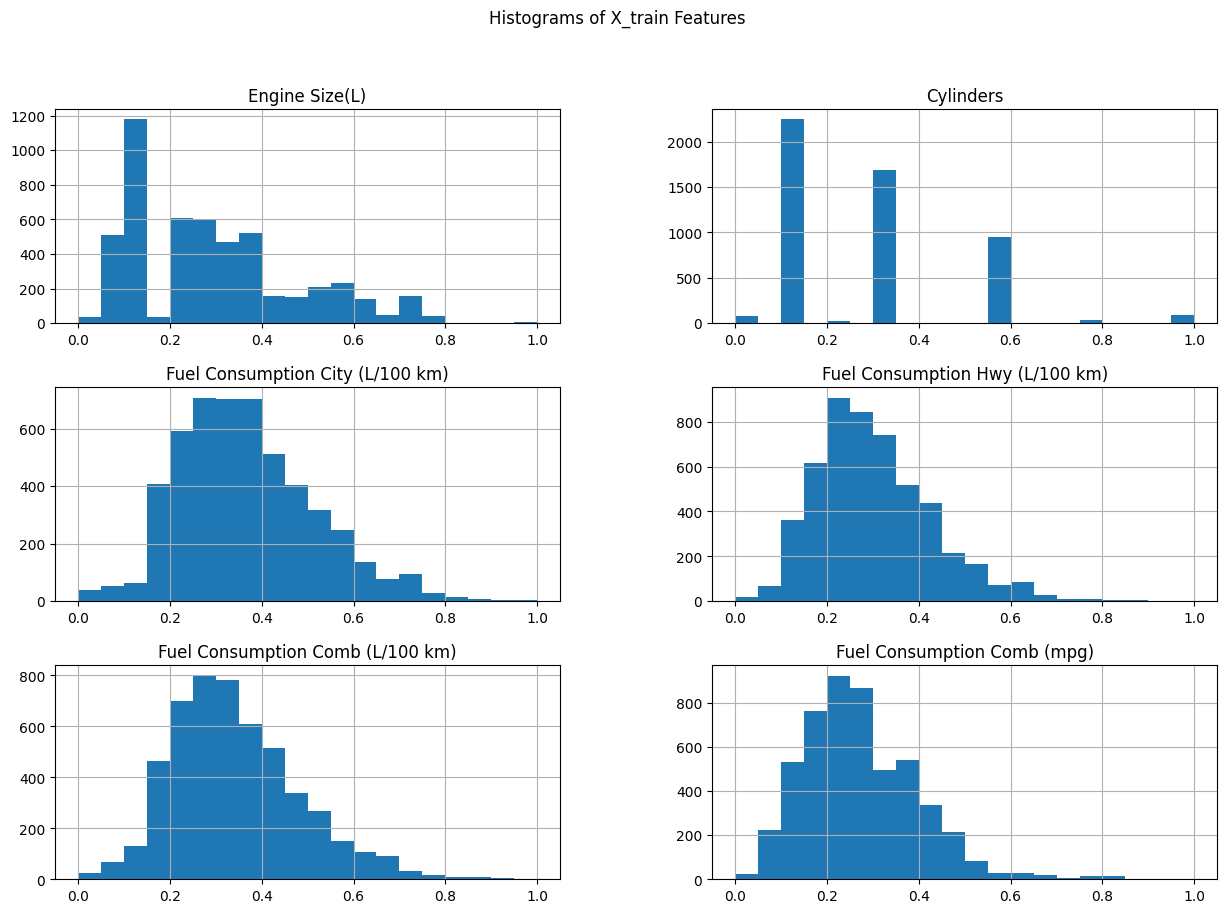

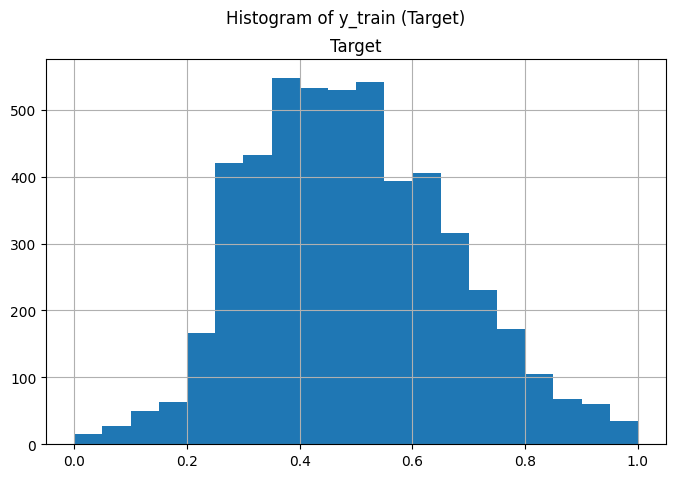

In [26]:
# Display shape of X_train and y_train
print("X_train shape:", x_train.shape)
print("y_train shape:", y_train.shape)

# Convert X_train and y_train to pandas DataFrames for easier analysis
X_train_df = pd.DataFrame(x_train, columns=["Engine Size(L)", "Cylinders", "Fuel Consumption City (L/100 km)", 
                                            "Fuel Consumption Hwy (L/100 km)", "Fuel Consumption Comb (L/100 km)", 
                                            "Fuel Consumption Comb (mpg)"])
y_train_df = pd.DataFrame(y_train, columns=["Target"])

# Display statistical summary of X_train and y_train
print("\nX_train summary:")
print(X_train_df.describe())
print("\ny_train summary:")
print(y_train_df.describe())

# Plot histograms of X_train features and y_train
X_train_df.hist(bins=20, figsize=(15, 10))
plt.suptitle("Histograms of X_train Features")
plt.show()

y_train_df.hist(bins=20, figsize=(8, 5))
plt.suptitle("Histogram of y_train (Target)")
plt.show()

In [27]:
# Define the model
model = Sequential([
    Dense(12, activation='relu', input_shape=(x_train.shape[1],)),
    Dense(10,  activation='relu'),
    Dense(6, activation='softmax'),
    Dense(1)  # Output layer
])



    Number of layers: 3
    Number of units in each layer: 12, 10, 6
    Total number of trainable parameters: 5112


In [28]:
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['acc'])

# Train the model
history= model.fit(x_train, y_train, epochs=30, batch_size=2, validation_data=(x_test, y_test))



Epoch 1/30


2556/2556 [==============================] - 7s 2ms/step - loss: 0.0114 - acc: 9.7809e-04 - val_loss: 0.0028 - val_acc: 0.0014
Epoch 2/30
2556/2556 [==============================] - 5s 2ms/step - loss: 0.0029 - acc: 9.7809e-04 - val_loss: 0.0021 - val_acc: 0.0014
Epoch 3/30
2556/2556 [==============================] - 5s 2ms/step - loss: 0.0023 - acc: 9.7809e-04 - val_loss: 0.0017 - val_acc: 0.0014
Epoch 4/30
2556/2556 [==============================] - 5s 2ms/step - loss: 0.0021 - acc: 9.7809e-04 - val_loss: 0.0017 - val_acc: 0.0014
Epoch 5/30
2556/2556 [==============================] - 6s 2ms/step - loss: 0.0021 - acc: 9.7809e-04 - val_loss: 0.0018 - val_acc: 0.0014
Epoch 6/30
2556/2556 [==============================] - 5s 2ms/step - loss: 0.0021 - acc: 9.7809e-04 - val_loss: 0.0017 - val_acc: 0.0014
Epoch 7/30
2556/2556 [==============================] - 6s 2ms/step - loss: 0.0020 - acc: 9.7809e-04 - val_loss: 0.0021 - val_acc: 0.0014
Epoch 8/30
2556/2556 [=========

In [29]:
test_loss = model.evaluate(x_test, y_test)
print("Test Loss:", test_loss)

# Make predictions
predictions_scaled = model.predict(x_test)
predictions = scaler_target.inverse_transform(predictions_scaled).flatten()
print("Predictions:", predictions)
actualTarget = scaler_target.inverse_transform(y_test.reshape(-1,1)).flatten()
print('Actual Target: ', actualTarget)



69/69 [==============================] - 0s 2ms/step - loss: 0.0011 - acc: 0.0014   
Test Loss: [0.0010704240994527936, 0.0013686130987480283]
69/69 [==============================] - 0s 1ms/step
Predictions: [293.1678  184.25485 222.06325 ... 278.3981  345.86435 173.58255]
Actual Target:  [290. 181. 220. ... 276. 347. 172.]


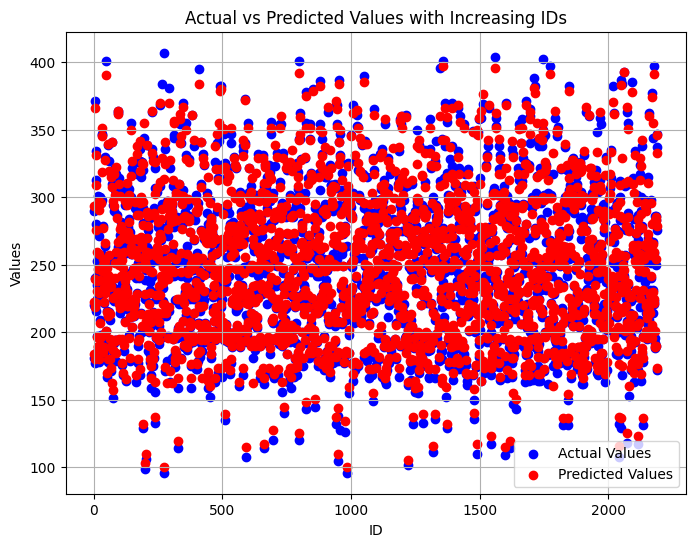

In [30]:
# Generate increasing IDs for x-axis
ids = range(len(actualTarget))

# Scale the predicted values back to original scale
predictions = scaler_target.inverse_transform(predictions_scaled).flatten()

# Plot actual values
plt.figure(figsize=(8, 6))
plt.scatter(ids, actualTarget, color='blue', label='Actual Values')

# Plot predicted values
plt.scatter(ids, predictions, color='red', label='Predicted Values')

plt.xlabel("ID")
plt.ylabel("Values")
plt.title("Actual vs Predicted Values with Increasing IDs")
plt.legend()
plt.grid(True)
plt.show()

NameError: name 'history' is not defined

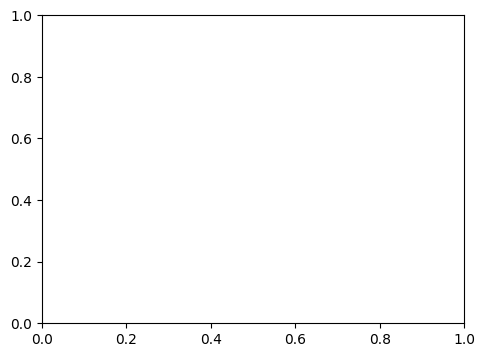

In [2]:
import matplotlib.pyplot as plt
# Plot the loss and accuracy
plt.figure(figsize=(12, 4))

# Plot loss
plt.subplot(1, 2, 1)  # 1 row, 2 columns, subplot 1
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot accuracy
plt.subplot(1, 2, 2)  # 1 row, 2 columns, subplot 2
plt.plot(history.history['acc'], label='Train Accuracy')
plt.plot(history.history['val_acc'], label='Test Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

# Calculate R-squared value
r2 = r2_score(actualTarget, predictions)
print("R-squared:", r2)

# Calculate Mean Absolute Error
mae = mean_absolute_error(actualTarget, predictions)
print("Mean Absolute Error:", mae)

# Calculate Mean Squared Error
mse = mean_squared_error(actualTarget, predictions)
print("Mean Squared Error:", mse)

# Plot the actual vs predicted values
plt.figure(figsize=(8, 6))
plt.scatter(actualTarget, predictions, color='blue')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Values")
plt.grid(True)
plt.show()